In [256]:
import tensorflow as  tf
from tensorflow import keras
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D,Dropout,MaxPooling1D,Activation,Flatten,Dense


In [2]:
test_path=os.path.join(os.getcwd(),"rawdata")

In [3]:
ipd.Audio(os.path.join(test_path,os.listdir(test_path)[0]))

In [6]:
data=os.listdir(test_path)

In [7]:
feeling_list=[]
for item in data:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append([item,'female_calm'])
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append([item,'male_calm'])
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append([item,'female_happy'])
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append([item,'male_happy'])
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append([item,'female_sad'])
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append([item,'male_sad'])
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append([item,'female_angry'])
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append([item,'male_angry'])

In [106]:
df = pd.DataFrame(columns=['features'])
count=0
for name,feeling in feeling_list:
    full_path=os.path.join(test_path,name)
    X, sample_rate = librosa.load(full_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
    features = mfccs
    df.loc[count] = [features]
    count=count+1

In [107]:
sample_rate

array(44100)

In [12]:
df_final = pd.DataFrame(df['features'].values.tolist())
df_final["feeling"]=np.array(feeling_list)[:,1]


In [16]:
df_final_S=shuffle(df_final)

In [21]:
df_final_S.isnull().sum()

0          0
1          0
2          0
3          0
4          0
          ..
212        1
213        1
214        1
215        1
feeling    0
Length: 217, dtype: int64

In [22]:
df_processed=df_final_S.fillna(value=0)

In [28]:
Le=LabelEncoder()
df_processed["feeling"]=Le.fit_transform(df_processed["feeling"])

<AxesSubplot:>

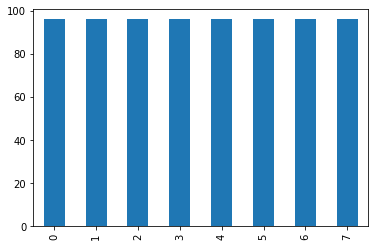

In [42]:
df_processed["feeling"].value_counts().plot.bar()

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(df_processed.iloc[:,:-1],df_processed.iloc[:,-1], test_size=0.33, random_state=42)

In [110]:
df_final

0          1          2          3          4          5  \
0   -70.267769 -70.267769 -70.267769 -70.267769 -70.267769 -70.267769   
1   -65.707649 -65.707649 -63.114719 -61.518997 -61.097141 -63.424599   
2   -65.482498 -65.482498 -65.482498 -65.482498 -65.482498 -65.482498   
3   -64.528450 -64.528450 -64.528450 -64.528450 -64.528450 -64.528450   
4   -62.364311 -59.934727 -61.869602 -67.495773 -71.071808 -65.679817   
..         ...        ...        ...        ...        ...        ...   
763 -48.035992 -48.035992 -48.035992 -48.035992 -48.035992 -48.035992   
764 -41.589390 -41.589390 -41.589390 -41.589390 -41.589390 -41.589390   
765 -49.118225 -49.171711 -48.633724 -48.457729 -48.155228 -48.165321   
766 -40.622002 -40.622002 -40.622002 -40.622002 -40.622002 -40.622002   
767 -52.015427 -52.015427 -52.015427 -52.015427 -52.015427 -52.015427   

             6          7          8          9  ...        207        208  \
0   -70.267769 -70.267769 -70.267769 -70.267769  ... -57.447464 -58.896500   
1   -63.720066 -56.854614 -55.168972 -54.639999  ... -39.792141 -40.613159   
2   -65.482498 -65.482498 -65.482498 -65.482498  ... -31.346556 -34.310772   
3   -64.528450 -64.528450 -64.528450 -65.928223  ... -48.674301 -48.596073   
4   -63.394402 -65.503349 -61.856644 -60.005428  ... -39.071327 -41.897121   
..         ...        ...        ...        ...  ...        ...        ...   
763 -48.035992 -47.938801 -47.644463 -47.549335  ... -48.035992 -48.035992   
764 -41.589390 -41.589390 -41.589390 -41.589390  ... -21.879768 -21.297997   
765 -47.880581 -48.698124 -48.548721 -47.591354  ... -33.466454 -33.984200   
766 -40.622002 -40.622002 -40.622002 -40.622002  ... -40.622002 -40.622002   
767 -52.015427 -52.015427 -52.015427 -52.015427  ... -51.413273 -51.080017   

           209        210        211        212        213        214  \
0   -58.750996 -57.405678 -60.078484 -63.426800 -62.638542 -61.082741   
1   -41.209202 -41.439201 -43.994286 -49.399620 -50.591599 -49.144051   
2   -35.800705 -35.936115 -37.631844 -40.119411 -41.662888 -41.323643   
3   -47.602745 -43.049198 -42.659542 -43.188560 -44.001240 -43.610100   
4   -40.865437 -38.290604 -36.372398 -37.915779 -40.026127 -43.383774   
..         ...        ...        ...        ...        ...        ...   
763 -48.035992 -48.035992 -48.035992 -48.035992 -48.035992 -48.035992   
764 -16.639414 -14.185689 -13.375396 -14.768592 -15.129277 -11.527274   
765 -33.900200 -33.247349 -33.471287 -31.636898 -30.704500 -17.725355   
766 -40.622002 -40.622002 -40.622002 -40.622002 -40.622002 -40.622002   
767 -51.295540 -49.903931 -45.695511 -43.176426 -40.878567 -36.302460   

           215       feeling  
0   -60.234661     male_calm  
1   -48.705654   female_calm  
2   -40.710770     male_calm  
3   -44.698246   female_calm  
4   -43.965401     male_calm  
..         ...           ...  
763 -48.035992  female_angry  
764  -7.073745    male_angry  
765 -12.636759  female_angry  
766 -40.622002    male_angry  
767 -30.763496  female_angry  

[768 rows x 217 columns]

In [62]:
X_train=np.expand_dims(X_train, axis=2)
X_test=np.expand_dims(X_test,axis=2)

In [265]:
model=keras.models.Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))


In [99]:
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [100]:
model.summary()
model.input

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 216, 256)          1536      
_________________________________________________________________
activation_32 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_33 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 27, 128)         

<tf.Tensor 'conv1d_28_input:0' shape=(None, 216, 1) dtype=float32>

In [101]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=opt,metrics=['accuracy'])


In [102]:
cnnhistory=model.fit(X_train, y_train, batch_size=16, epochs=700, validation_data=(X_test, y_test))


Epoch 1/700
33/33 [==============================] - 1s 39ms/step - loss: 2.5320 - accuracy: 0.1128 - val_loss: 2.1403 - val_accuracy: 0.1142
Epoch 2/700
33/33 [==============================] - 1s 36ms/step - loss: 2.0964 - accuracy: 0.1323 - val_loss: 2.0925 - val_accuracy: 0.0748
Epoch 3/700
33/33 [==============================] - 1s 36ms/step - loss: 2.0625 - accuracy: 0.1304 - val_loss: 2.0633 - val_accuracy: 0.1378
Epoch 4/700
33/33 [==============================] - 1s 38ms/step - loss: 2.0335 - accuracy: 0.1537 - val_loss: 2.0523 - val_accuracy: 0.1535
Epoch 5/700
33/33 [==============================] - 1s 39ms/step - loss: 2.0131 - accuracy: 0.1751 - val_loss: 2.0140 - val_accuracy: 0.1929
Epoch 6/700
33/33 [==============================] - 1s 38ms/step - loss: 1.9924 - accuracy: 0.1984 - val_loss: 2.0096 - val_accuracy: 0.1772
Epoch 7/700
33/33 [==============================] - 1s 38ms/step - loss: 1.9801 - accuracy: 0.1926 - val_loss: 1.9864 - val_accuracy: 0.2244
Epoch 

33/33 [==============================] - 2s 73ms/step - loss: 1.4712 - accuracy: 0.4922 - val_loss: 1.5853 - val_accuracy: 0.3622
Epoch 59/700
33/33 [==============================] - 2s 68ms/step - loss: 1.4711 - accuracy: 0.4883 - val_loss: 1.5149 - val_accuracy: 0.4016
Epoch 60/700
33/33 [==============================] - 2s 67ms/step - loss: 1.4498 - accuracy: 0.5000 - val_loss: 1.5136 - val_accuracy: 0.3937
Epoch 61/700
33/33 [==============================] - 2s 69ms/step - loss: 1.4436 - accuracy: 0.4805 - val_loss: 1.5370 - val_accuracy: 0.4173
Epoch 62/700
33/33 [==============================] - 3s 78ms/step - loss: 1.4464 - accuracy: 0.5019 - val_loss: 1.5348 - val_accuracy: 0.4213
Epoch 63/700
33/33 [==============================] - 2s 60ms/step - loss: 1.4342 - accuracy: 0.4942 - val_loss: 1.5071 - val_accuracy: 0.3937
Epoch 64/700
33/33 [==============================] - 2s 62ms/step - loss: 1.4267 - accuracy: 0.5097 - val_loss: 1.4929 - val_accuracy: 0.4606
Epoch 65/700

33/33 [==============================] - 2s 70ms/step - loss: 1.1826 - accuracy: 0.5720 - val_loss: 1.2983 - val_accuracy: 0.4843
Epoch 116/700
33/33 [==============================] - 3s 94ms/step - loss: 1.1762 - accuracy: 0.5739 - val_loss: 1.3224 - val_accuracy: 0.4961
Epoch 117/700
33/33 [==============================] - 2s 70ms/step - loss: 1.1756 - accuracy: 0.5700 - val_loss: 1.2915 - val_accuracy: 0.4528
Epoch 118/700
33/33 [==============================] - 2s 68ms/step - loss: 1.1734 - accuracy: 0.5700 - val_loss: 1.3769 - val_accuracy: 0.4134
Epoch 119/700
33/33 [==============================] - 2s 75ms/step - loss: 1.1680 - accuracy: 0.5739 - val_loss: 1.3449 - val_accuracy: 0.4331
Epoch 120/700
33/33 [==============================] - 2s 69ms/step - loss: 1.1608 - accuracy: 0.5681 - val_loss: 1.2746 - val_accuracy: 0.4567
Epoch 121/700
33/33 [==============================] - 3s 82ms/step - loss: 1.1580 - accuracy: 0.5584 - val_loss: 1.3282 - val_accuracy: 0.4567
Epoch 

Epoch 172/700
33/33 [==============================] - 2s 67ms/step - loss: 1.0338 - accuracy: 0.6362 - val_loss: 1.2243 - val_accuracy: 0.5157
Epoch 173/700
33/33 [==============================] - 2s 66ms/step - loss: 1.0252 - accuracy: 0.6342 - val_loss: 1.2196 - val_accuracy: 0.4567
Epoch 174/700
33/33 [==============================] - 2s 76ms/step - loss: 1.0307 - accuracy: 0.6128 - val_loss: 1.3175 - val_accuracy: 0.4528
Epoch 175/700
33/33 [==============================] - 3s 86ms/step - loss: 1.0226 - accuracy: 0.6051 - val_loss: 1.2246 - val_accuracy: 0.5118
Epoch 176/700
33/33 [==============================] - 3s 79ms/step - loss: 1.0122 - accuracy: 0.6167 - val_loss: 1.2538 - val_accuracy: 0.4803
Epoch 177/700
33/33 [==============================] - 3s 81ms/step - loss: 1.0154 - accuracy: 0.6304 - val_loss: 1.2589 - val_accuracy: 0.4921
Epoch 178/700
33/33 [==============================] - 2s 70ms/step - loss: 1.0110 - accuracy: 0.6109 - val_loss: 1.3158 - val_accuracy:

Epoch 229/700
33/33 [==============================] - 3s 84ms/step - loss: 0.9322 - accuracy: 0.6518 - val_loss: 1.1955 - val_accuracy: 0.4803
Epoch 230/700
33/33 [==============================] - 3s 95ms/step - loss: 0.9196 - accuracy: 0.6732 - val_loss: 1.2798 - val_accuracy: 0.4646
Epoch 231/700
33/33 [==============================] - 2s 74ms/step - loss: 0.9133 - accuracy: 0.6634 - val_loss: 1.2550 - val_accuracy: 0.4843
Epoch 232/700
33/33 [==============================] - 2s 70ms/step - loss: 0.9199 - accuracy: 0.6595 - val_loss: 1.4193 - val_accuracy: 0.4252
Epoch 233/700
33/33 [==============================] - 2s 71ms/step - loss: 0.9178 - accuracy: 0.6576 - val_loss: 1.3403 - val_accuracy: 0.4567
Epoch 234/700
33/33 [==============================] - 3s 86ms/step - loss: 0.9009 - accuracy: 0.6790 - val_loss: 1.1867 - val_accuracy: 0.5157
Epoch 235/700
33/33 [==============================] - 3s 100ms/step - loss: 0.8987 - accuracy: 0.6654 - val_loss: 1.1633 - val_accuracy

Epoch 286/700
33/33 [==============================] - 3s 81ms/step - loss: 0.8146 - accuracy: 0.7062 - val_loss: 1.1589 - val_accuracy: 0.5079
Epoch 287/700
33/33 [==============================] - 3s 79ms/step - loss: 0.8154 - accuracy: 0.7004 - val_loss: 1.3599 - val_accuracy: 0.4173
Epoch 288/700
33/33 [==============================] - 3s 76ms/step - loss: 0.8133 - accuracy: 0.7121 - val_loss: 1.1567 - val_accuracy: 0.5197
Epoch 289/700
33/33 [==============================] - 2s 68ms/step - loss: 0.8215 - accuracy: 0.6946 - val_loss: 1.1730 - val_accuracy: 0.5039
Epoch 290/700
33/33 [==============================] - 2s 69ms/step - loss: 0.8034 - accuracy: 0.7043 - val_loss: 1.1451 - val_accuracy: 0.5157
Epoch 291/700
33/33 [==============================] - 2s 73ms/step - loss: 0.8200 - accuracy: 0.6770 - val_loss: 1.2066 - val_accuracy: 0.5157
Epoch 292/700
33/33 [==============================] - 3s 86ms/step - loss: 0.8101 - accuracy: 0.6965 - val_loss: 1.2340 - val_accuracy:

Epoch 343/700
33/33 [==============================] - 2s 66ms/step - loss: 0.7209 - accuracy: 0.7665 - val_loss: 1.1357 - val_accuracy: 0.5472
Epoch 344/700
33/33 [==============================] - 2s 69ms/step - loss: 0.7210 - accuracy: 0.7529 - val_loss: 1.1617 - val_accuracy: 0.5315
Epoch 345/700
33/33 [==============================] - 2s 75ms/step - loss: 0.7103 - accuracy: 0.7432 - val_loss: 1.4304 - val_accuracy: 0.4724
Epoch 346/700
33/33 [==============================] - 3s 82ms/step - loss: 0.7234 - accuracy: 0.7354 - val_loss: 1.1406 - val_accuracy: 0.5118
Epoch 347/700
33/33 [==============================] - 3s 79ms/step - loss: 0.7101 - accuracy: 0.7549 - val_loss: 1.1269 - val_accuracy: 0.5472
Epoch 348/700
33/33 [==============================] - 2s 73ms/step - loss: 0.7218 - accuracy: 0.7510 - val_loss: 1.2083 - val_accuracy: 0.5236
Epoch 349/700
33/33 [==============================] - 2s 69ms/step - loss: 0.7254 - accuracy: 0.7393 - val_loss: 1.1629 - val_accuracy:

Epoch 400/700
33/33 [==============================] - 3s 79ms/step - loss: 0.6322 - accuracy: 0.7840 - val_loss: 1.3689 - val_accuracy: 0.4646
Epoch 401/700
33/33 [==============================] - 2s 74ms/step - loss: 0.6513 - accuracy: 0.7782 - val_loss: 1.1932 - val_accuracy: 0.5433
Epoch 402/700
33/33 [==============================] - 2s 73ms/step - loss: 0.6220 - accuracy: 0.7977 - val_loss: 1.1390 - val_accuracy: 0.5551
Epoch 403/700
33/33 [==============================] - 2s 71ms/step - loss: 0.6083 - accuracy: 0.8152 - val_loss: 1.2066 - val_accuracy: 0.5276
Epoch 404/700
33/33 [==============================] - 2s 74ms/step - loss: 0.6233 - accuracy: 0.7860 - val_loss: 1.2479 - val_accuracy: 0.5079
Epoch 405/700
33/33 [==============================] - 2s 74ms/step - loss: 0.6315 - accuracy: 0.7918 - val_loss: 1.2153 - val_accuracy: 0.5039
Epoch 406/700
33/33 [==============================] - 2s 69ms/step - loss: 0.6269 - accuracy: 0.7840 - val_loss: 1.1881 - val_accuracy:

Epoch 457/700
33/33 [==============================] - 3s 79ms/step - loss: 0.5497 - accuracy: 0.8366 - val_loss: 1.1909 - val_accuracy: 0.5709
Epoch 458/700
33/33 [==============================] - 2s 72ms/step - loss: 0.5583 - accuracy: 0.8191 - val_loss: 1.2981 - val_accuracy: 0.5157
Epoch 459/700
33/33 [==============================] - 3s 78ms/step - loss: 0.5465 - accuracy: 0.8230 - val_loss: 1.1497 - val_accuracy: 0.5236
Epoch 460/700
33/33 [==============================] - 3s 84ms/step - loss: 0.5440 - accuracy: 0.8191 - val_loss: 1.1685 - val_accuracy: 0.5236
Epoch 461/700
33/33 [==============================] - 3s 88ms/step - loss: 0.5538 - accuracy: 0.8249 - val_loss: 1.3371 - val_accuracy: 0.5236
Epoch 462/700
33/33 [==============================] - 2s 74ms/step - loss: 0.5351 - accuracy: 0.8288 - val_loss: 1.1657 - val_accuracy: 0.5433
Epoch 463/700
33/33 [==============================] - 2s 75ms/step - loss: 0.5322 - accuracy: 0.8405 - val_loss: 1.2223 - val_accuracy:

Epoch 514/700
33/33 [==============================] - 4s 109ms/step - loss: 0.4685 - accuracy: 0.8755 - val_loss: 1.1803 - val_accuracy: 0.5472
Epoch 515/700
33/33 [==============================] - 3s 105ms/step - loss: 0.4620 - accuracy: 0.8658 - val_loss: 1.2501 - val_accuracy: 0.5354
Epoch 516/700
33/33 [==============================] - 4s 107ms/step - loss: 0.4556 - accuracy: 0.8658 - val_loss: 1.2082 - val_accuracy: 0.5591
Epoch 517/700
33/33 [==============================] - 4s 121ms/step - loss: 0.4611 - accuracy: 0.8560 - val_loss: 1.2065 - val_accuracy: 0.5354
Epoch 518/700
33/33 [==============================] - 3s 103ms/step - loss: 0.4549 - accuracy: 0.8638 - val_loss: 1.4310 - val_accuracy: 0.4803
Epoch 519/700
33/33 [==============================] - 3s 85ms/step - loss: 0.4574 - accuracy: 0.8755 - val_loss: 1.1512 - val_accuracy: 0.5512
Epoch 520/700
33/33 [==============================] - 3s 92ms/step - loss: 0.4540 - accuracy: 0.8580 - val_loss: 1.2059 - val_accu

33/33 [==============================] - 3s 80ms/step - loss: 0.3905 - accuracy: 0.8988 - val_loss: 1.3153 - val_accuracy: 0.5551
Epoch 571/700
33/33 [==============================] - 3s 79ms/step - loss: 0.3942 - accuracy: 0.8930 - val_loss: 1.4560 - val_accuracy: 0.5039
Epoch 572/700
33/33 [==============================] - 3s 84ms/step - loss: 0.3838 - accuracy: 0.8911 - val_loss: 1.2537 - val_accuracy: 0.5354
Epoch 573/700
33/33 [==============================] - 2s 72ms/step - loss: 0.3792 - accuracy: 0.8969 - val_loss: 1.2776 - val_accuracy: 0.5394
Epoch 574/700
33/33 [==============================] - 2s 72ms/step - loss: 0.3793 - accuracy: 0.8891 - val_loss: 1.2528 - val_accuracy: 0.5394
Epoch 575/700
33/33 [==============================] - 3s 80ms/step - loss: 0.3699 - accuracy: 0.9027 - val_loss: 1.4042 - val_accuracy: 0.5236
Epoch 576/700
33/33 [==============================] - 3s 88ms/step - loss: 0.3731 - accuracy: 0.9105 - val_loss: 1.4330 - val_accuracy: 0.5079
Epoch 

Epoch 627/700
33/33 [==============================] - 3s 95ms/step - loss: 0.3045 - accuracy: 0.9319 - val_loss: 1.4658 - val_accuracy: 0.5118
Epoch 628/700
33/33 [==============================] - 3s 76ms/step - loss: 0.3009 - accuracy: 0.9280 - val_loss: 1.3467 - val_accuracy: 0.5276
Epoch 629/700
33/33 [==============================] - 3s 79ms/step - loss: 0.3017 - accuracy: 0.9377 - val_loss: 1.4078 - val_accuracy: 0.5197
Epoch 630/700
33/33 [==============================] - 3s 89ms/step - loss: 0.2984 - accuracy: 0.9241 - val_loss: 1.3812 - val_accuracy: 0.5394
Epoch 631/700
33/33 [==============================] - 3s 91ms/step - loss: 0.3051 - accuracy: 0.9261 - val_loss: 1.4401 - val_accuracy: 0.5236
Epoch 632/700
33/33 [==============================] - 3s 91ms/step - loss: 0.3041 - accuracy: 0.9397 - val_loss: 1.3385 - val_accuracy: 0.5354
Epoch 633/700
33/33 [==============================] - 6s 176ms/step - loss: 0.2925 - accuracy: 0.9397 - val_loss: 1.4325 - val_accuracy

Epoch 684/700
33/33 [==============================] - 3s 90ms/step - loss: 0.2366 - accuracy: 0.9533 - val_loss: 1.4985 - val_accuracy: 0.5236
Epoch 685/700
33/33 [==============================] - 3s 88ms/step - loss: 0.2345 - accuracy: 0.9591 - val_loss: 1.3671 - val_accuracy: 0.5354
Epoch 686/700
33/33 [==============================] - 3s 77ms/step - loss: 0.2297 - accuracy: 0.9553 - val_loss: 1.3435 - val_accuracy: 0.5354
Epoch 687/700
33/33 [==============================] - 2s 72ms/step - loss: 0.2321 - accuracy: 0.9591 - val_loss: 1.3758 - val_accuracy: 0.5433
Epoch 688/700
33/33 [==============================] - 3s 78ms/step - loss: 0.2351 - accuracy: 0.9572 - val_loss: 1.5092 - val_accuracy: 0.5118
Epoch 689/700
33/33 [==============================] - 4s 113ms/step - loss: 0.2276 - accuracy: 0.9475 - val_loss: 1.3718 - val_accuracy: 0.5197
Epoch 690/700
33/33 [==============================] - 3s 96ms/step - loss: 0.2302 - accuracy: 0.9689 - val_loss: 1.3323 - val_accuracy

<AxesSubplot:>

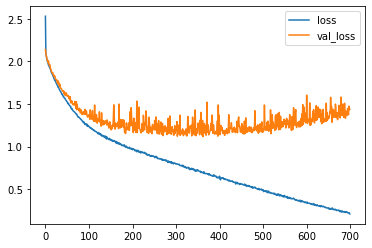

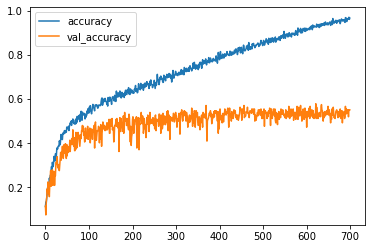

In [178]:
# pd.DataFrame(cnnhistory.history["loss","val_loss"]).plot()
pd.DataFrame(cnnhistory.history)[["loss","val_loss"]].plot()
pd.DataFrame(cnnhistory.history)[["accuracy","val_accuracy"]].plot()

In [68]:
X_train.shape

(514, 216, 1)

In [97]:
Le.classes_

array(['female_angry', 'female_calm', 'female_happy', 'female_sad',
       'male_angry', 'male_calm', 'male_happy', 'male_sad'], dtype=object)

In [103]:
X_train.shape

(514, 216, 1)

In [111]:
model

(254, 216, 1)

In [114]:
model.input_shape

(None, 216, 1)

In [123]:
pred=model.predict_classes(X_test)

In [120]:
y_test

18     5
591    0
338    6
657    0
466    7
      ..
747    0
159    1
270    6
293    2
158    5
Name: feeling, Length: 254, dtype: int32

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [140]:
confusion_matrix(y_test,pred,labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[19,  2,  2,  1,  2,  1,  3,  1],
       [ 1, 19,  5,  5,  0,  2,  0,  3],
       [ 6,  2, 16,  4,  0,  0,  0,  1],
       [ 5,  7,  5, 12,  0,  0,  0,  3],
       [ 1,  0,  0,  0, 34,  0,  2,  0],
       [ 0,  1,  0,  0,  2, 15,  5,  7],
       [ 1,  0,  0,  0,  7,  2, 11,  3],
       [ 1,  0,  0,  0,  5,  5, 11, 14]], dtype=int64)

In [139]:
[i for i in range(8)]

[0, 1, 2, 3, 4, 5, 6, 7]

In [134]:
pred

array([1, 4, 4, 6, 4, 3, 2, 1, 0, 5, 6, 7, 0, 0, 4, 7, 6, 4, 0, 1, 7, 7,
       1, 7, 3, 3, 4, 4, 4, 6, 5, 4, 7, 4, 7, 6, 6, 2, 7, 1, 0, 1, 5, 0,
       4, 4, 0, 1, 0, 4, 2, 0, 5, 2, 2, 6, 6, 6, 6, 4, 2, 0, 5, 4, 7, 5,
       7, 6, 7, 3, 4, 7, 1, 2, 6, 7, 6, 1, 1, 6, 4, 0, 0, 7, 3, 7, 5, 4,
       6, 4, 3, 7, 4, 4, 0, 1, 5, 6, 3, 1, 0, 4, 4, 3, 3, 3, 3, 4, 3, 4,
       3, 0, 0, 2, 5, 4, 7, 6, 0, 2, 2, 0, 0, 1, 5, 7, 4, 1, 0, 0, 7, 2,
       4, 6, 3, 2, 4, 0, 4, 0, 6, 7, 4, 3, 6, 4, 4, 0, 7, 1, 1, 0, 2, 7,
       1, 4, 5, 5, 4, 1, 3, 5, 6, 0, 2, 4, 0, 7, 0, 5, 4, 1, 0, 2, 2, 5,
       2, 0, 4, 2, 4, 2, 1, 5, 5, 5, 1, 3, 6, 5, 6, 6, 4, 0, 7, 2, 1, 7,
       4, 4, 7, 6, 7, 2, 0, 1, 6, 6, 7, 7, 4, 0, 4, 2, 1, 5, 3, 6, 1, 4,
       5, 1, 7, 6, 6, 2, 2, 2, 4, 1, 6, 4, 7, 4, 4, 5, 4, 3, 3, 2, 2, 1,
       1, 7, 0, 5, 1, 3, 6, 2, 1, 5, 3, 5], dtype=int64)

In [143]:
t_model=keras.models.load_model(r"C:\Users\Sharath\Downloads\Emotion_Voice_Detection_Model (1).h5")

In [160]:
t_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_9 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 27, 128)         

In [148]:
t_model.load_weights(r"C:\Users\Sharath\Downloads\Emotion_Voice_Detection_Model (1).h5")

In [149]:
for layer in t_model.layers:
    layer.trainable=False

In [158]:
last_layer=t_model.get_layer(index=15)

In [161]:
last_output=last_layer.output

In [162]:
x=keras.layers.Dense(8,activation="softmax")(last_output)

In [164]:
model2=keras.models.Model(t_model.input,x)

In [165]:
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7_input (InputLayer)  [(None, 216, 1)]          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_9 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 128)          

In [180]:
model23.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=opt,metrics=['accuracy'])

cnnhistory2=model2.fit(X_train, y_train, batch_size=16, epochs=700, validation_data=(X_test, y_test))


Epoch 1/700
33/33 [==============================] - 1s 23ms/step - loss: 5.5832 - accuracy: 0.1089 - val_loss: 4.0606 - val_accuracy: 0.1102
Epoch 2/700
33/33 [==============================] - 1s 17ms/step - loss: 4.5672 - accuracy: 0.1284 - val_loss: 3.5091 - val_accuracy: 0.1181
Epoch 3/700
33/33 [==============================] - 1s 18ms/step - loss: 4.0315 - accuracy: 0.1401 - val_loss: 3.2678 - val_accuracy: 0.1181
Epoch 4/700
33/33 [==============================] - 1s 16ms/step - loss: 3.8180 - accuracy: 0.1479 - val_loss: 3.0914 - val_accuracy: 0.1181
Epoch 5/700
33/33 [==============================] - 1s 18ms/step - loss: 3.6146 - accuracy: 0.1615 - val_loss: 2.9401 - val_accuracy: 0.1457
Epoch 6/700
33/33 [==============================] - 1s 16ms/step - loss: 3.4686 - accuracy: 0.1926 - val_loss: 2.7991 - val_accuracy: 0.1654
Epoch 7/700
33/33 [==============================] - 1s 17ms/step - loss: 3.3474 - accuracy: 0.1946 - val_loss: 2.6806 - val_accuracy: 0.1850
Epoch 

33/33 [==============================] - 1s 34ms/step - loss: 1.4525 - accuracy: 0.4903 - val_loss: 1.3686 - val_accuracy: 0.5197
Epoch 59/700
33/33 [==============================] - 1s 36ms/step - loss: 1.4125 - accuracy: 0.4961 - val_loss: 1.3639 - val_accuracy: 0.5157
Epoch 60/700
33/33 [==============================] - 1s 32ms/step - loss: 1.4962 - accuracy: 0.5058 - val_loss: 1.3620 - val_accuracy: 0.5157
Epoch 61/700
33/33 [==============================] - 1s 30ms/step - loss: 1.4725 - accuracy: 0.5136 - val_loss: 1.3564 - val_accuracy: 0.5118
Epoch 62/700
33/33 [==============================] - 1s 27ms/step - loss: 1.4320 - accuracy: 0.5039 - val_loss: 1.3491 - val_accuracy: 0.5197
Epoch 63/700
33/33 [==============================] - 1s 26ms/step - loss: 1.3382 - accuracy: 0.5097 - val_loss: 1.3421 - val_accuracy: 0.5236
Epoch 64/700
33/33 [==============================] - 1s 26ms/step - loss: 1.3943 - accuracy: 0.5214 - val_loss: 1.3381 - val_accuracy: 0.5236
Epoch 65/700

33/33 [==============================] - 1s 20ms/step - loss: 1.0810 - accuracy: 0.6128 - val_loss: 1.1870 - val_accuracy: 0.5512
Epoch 116/700
33/33 [==============================] - 1s 18ms/step - loss: 1.0384 - accuracy: 0.6148 - val_loss: 1.1911 - val_accuracy: 0.5433
Epoch 117/700
33/33 [==============================] - 1s 20ms/step - loss: 1.0334 - accuracy: 0.6070 - val_loss: 1.1848 - val_accuracy: 0.5433
Epoch 118/700
33/33 [==============================] - 1s 18ms/step - loss: 1.0162 - accuracy: 0.6051 - val_loss: 1.1796 - val_accuracy: 0.5433
Epoch 119/700
33/33 [==============================] - 1s 18ms/step - loss: 1.0746 - accuracy: 0.6148 - val_loss: 1.1884 - val_accuracy: 0.5394
Epoch 120/700
33/33 [==============================] - 1s 18ms/step - loss: 1.0470 - accuracy: 0.6284 - val_loss: 1.1807 - val_accuracy: 0.5472
Epoch 121/700
33/33 [==============================] - 1s 18ms/step - loss: 0.9816 - accuracy: 0.6265 - val_loss: 1.1790 - val_accuracy: 0.5551
Epoch 

Epoch 172/700
33/33 [==============================] - 1s 19ms/step - loss: 0.8007 - accuracy: 0.6887 - val_loss: 1.0924 - val_accuracy: 0.6024
Epoch 173/700
33/33 [==============================] - 1s 18ms/step - loss: 0.8036 - accuracy: 0.6751 - val_loss: 1.0971 - val_accuracy: 0.5984
Epoch 174/700
33/33 [==============================] - 1s 19ms/step - loss: 0.8708 - accuracy: 0.6654 - val_loss: 1.1038 - val_accuracy: 0.5945
Epoch 175/700
33/33 [==============================] - 1s 18ms/step - loss: 0.8120 - accuracy: 0.6751 - val_loss: 1.1076 - val_accuracy: 0.5827
Epoch 176/700
33/33 [==============================] - 1s 19ms/step - loss: 0.7859 - accuracy: 0.6946 - val_loss: 1.1035 - val_accuracy: 0.5906
Epoch 177/700
33/33 [==============================] - 1s 18ms/step - loss: 0.7890 - accuracy: 0.6984 - val_loss: 1.1081 - val_accuracy: 0.5709
Epoch 178/700
33/33 [==============================] - 1s 19ms/step - loss: 0.7891 - accuracy: 0.6926 - val_loss: 1.0931 - val_accuracy:

Epoch 229/700
33/33 [==============================] - 1s 19ms/step - loss: 0.7223 - accuracy: 0.7237 - val_loss: 1.0488 - val_accuracy: 0.6102
Epoch 230/700
33/33 [==============================] - 1s 20ms/step - loss: 0.6566 - accuracy: 0.7588 - val_loss: 1.0668 - val_accuracy: 0.5984
Epoch 231/700
33/33 [==============================] - 1s 20ms/step - loss: 0.7222 - accuracy: 0.7121 - val_loss: 1.0538 - val_accuracy: 0.6063
Epoch 232/700
33/33 [==============================] - 1s 20ms/step - loss: 0.7026 - accuracy: 0.7140 - val_loss: 1.0524 - val_accuracy: 0.6142
Epoch 233/700
33/33 [==============================] - 1s 20ms/step - loss: 0.7300 - accuracy: 0.7101 - val_loss: 1.0495 - val_accuracy: 0.6102
Epoch 234/700
33/33 [==============================] - 1s 20ms/step - loss: 0.6480 - accuracy: 0.7588 - val_loss: 1.0437 - val_accuracy: 0.6063
Epoch 235/700
33/33 [==============================] - 1s 19ms/step - loss: 0.6885 - accuracy: 0.7354 - val_loss: 1.0393 - val_accuracy:

33/33 [==============================] - 1s 21ms/step - loss: 0.6085 - accuracy: 0.7529 - val_loss: 1.0135 - val_accuracy: 0.6260
Epoch 286/700
33/33 [==============================] - 1s 20ms/step - loss: 0.5417 - accuracy: 0.8113 - val_loss: 1.0171 - val_accuracy: 0.6299
Epoch 287/700
33/33 [==============================] - 1s 20ms/step - loss: 0.6211 - accuracy: 0.7588 - val_loss: 1.0082 - val_accuracy: 0.6220
Epoch 288/700
33/33 [==============================] - 1s 20ms/step - loss: 0.5690 - accuracy: 0.7821 - val_loss: 1.0078 - val_accuracy: 0.6142
Epoch 289/700
33/33 [==============================] - 1s 21ms/step - loss: 0.5705 - accuracy: 0.7840 - val_loss: 1.0119 - val_accuracy: 0.6260
Epoch 290/700
33/33 [==============================] - 1s 21ms/step - loss: 0.5466 - accuracy: 0.7918 - val_loss: 1.0253 - val_accuracy: 0.6339
Epoch 291/700
33/33 [==============================] - 1s 21ms/step - loss: 0.5728 - accuracy: 0.7782 - val_loss: 1.0232 - val_accuracy: 0.6378
Epoch 

Epoch 342/700
33/33 [==============================] - 1s 24ms/step - loss: 0.5122 - accuracy: 0.7977 - val_loss: 1.0119 - val_accuracy: 0.6142
Epoch 343/700
33/33 [==============================] - 1s 24ms/step - loss: 0.5196 - accuracy: 0.7899 - val_loss: 0.9989 - val_accuracy: 0.6220
Epoch 344/700
33/33 [==============================] - 1s 26ms/step - loss: 0.4949 - accuracy: 0.8171 - val_loss: 1.0113 - val_accuracy: 0.6063
Epoch 345/700
33/33 [==============================] - 1s 27ms/step - loss: 0.5401 - accuracy: 0.8035 - val_loss: 1.0108 - val_accuracy: 0.6181
Epoch 346/700
33/33 [==============================] - 1s 28ms/step - loss: 0.4947 - accuracy: 0.8171 - val_loss: 1.0095 - val_accuracy: 0.6220
Epoch 347/700
33/33 [==============================] - 1s 27ms/step - loss: 0.4971 - accuracy: 0.8113 - val_loss: 1.0067 - val_accuracy: 0.6417
Epoch 348/700
33/33 [==============================] - 1s 24ms/step - loss: 0.4678 - accuracy: 0.8191 - val_loss: 1.0024 - val_accuracy:

Epoch 399/700
33/33 [==============================] - 1s 24ms/step - loss: 0.4345 - accuracy: 0.8444 - val_loss: 0.9869 - val_accuracy: 0.6260
Epoch 400/700
33/33 [==============================] - 1s 22ms/step - loss: 0.4235 - accuracy: 0.8366 - val_loss: 0.9814 - val_accuracy: 0.6142
Epoch 401/700
33/33 [==============================] - 1s 23ms/step - loss: 0.4448 - accuracy: 0.8385 - val_loss: 0.9760 - val_accuracy: 0.6181
Epoch 402/700
33/33 [==============================] - 1s 21ms/step - loss: 0.4241 - accuracy: 0.8210 - val_loss: 0.9773 - val_accuracy: 0.6181
Epoch 403/700
33/33 [==============================] - 1s 23ms/step - loss: 0.4598 - accuracy: 0.8230 - val_loss: 0.9756 - val_accuracy: 0.6220
Epoch 404/700
33/33 [==============================] - 1s 25ms/step - loss: 0.4470 - accuracy: 0.8113 - val_loss: 0.9815 - val_accuracy: 0.6181
Epoch 405/700
33/33 [==============================] - 1s 23ms/step - loss: 0.4180 - accuracy: 0.8541 - val_loss: 0.9817 - val_accuracy:

33/33 [==============================] - 1s 23ms/step - loss: 0.3888 - accuracy: 0.8677 - val_loss: 0.9444 - val_accuracy: 0.6417
Epoch 456/700
33/33 [==============================] - 1s 22ms/step - loss: 0.3954 - accuracy: 0.8541 - val_loss: 0.9677 - val_accuracy: 0.6417
Epoch 457/700
33/33 [==============================] - 1s 22ms/step - loss: 0.3705 - accuracy: 0.8677 - val_loss: 0.9591 - val_accuracy: 0.6260
Epoch 458/700
33/33 [==============================] - 1s 22ms/step - loss: 0.3994 - accuracy: 0.8424 - val_loss: 0.9689 - val_accuracy: 0.6496
Epoch 459/700
33/33 [==============================] - 1s 24ms/step - loss: 0.3822 - accuracy: 0.8638 - val_loss: 0.9677 - val_accuracy: 0.6260
Epoch 460/700
33/33 [==============================] - 1s 21ms/step - loss: 0.3471 - accuracy: 0.8696 - val_loss: 0.9619 - val_accuracy: 0.6220
Epoch 461/700
33/33 [==============================] - 1s 22ms/step - loss: 0.3531 - accuracy: 0.8852 - val_loss: 0.9486 - val_accuracy: 0.6496
Epoch 

Epoch 512/700
33/33 [==============================] - 1s 24ms/step - loss: 0.3588 - accuracy: 0.8638 - val_loss: 0.9640 - val_accuracy: 0.6378
Epoch 513/700
33/33 [==============================] - 1s 23ms/step - loss: 0.3087 - accuracy: 0.8911 - val_loss: 0.9576 - val_accuracy: 0.6260
Epoch 514/700
33/33 [==============================] - 1s 24ms/step - loss: 0.3393 - accuracy: 0.8774 - val_loss: 0.9598 - val_accuracy: 0.6457
Epoch 515/700
33/33 [==============================] - 1s 23ms/step - loss: 0.3436 - accuracy: 0.8852 - val_loss: 0.9564 - val_accuracy: 0.6378
Epoch 516/700
33/33 [==============================] - 1s 22ms/step - loss: 0.3007 - accuracy: 0.8930 - val_loss: 0.9453 - val_accuracy: 0.6299
Epoch 517/700
33/33 [==============================] - 1s 22ms/step - loss: 0.3056 - accuracy: 0.9047 - val_loss: 0.9579 - val_accuracy: 0.6260
Epoch 518/700
33/33 [==============================] - 1s 22ms/step - loss: 0.3064 - accuracy: 0.8872 - val_loss: 0.9527 - val_accuracy:

Epoch 569/700
33/33 [==============================] - 1s 26ms/step - loss: 0.2601 - accuracy: 0.9144 - val_loss: 0.9519 - val_accuracy: 0.6457
Epoch 570/700
33/33 [==============================] - 1s 24ms/step - loss: 0.2899 - accuracy: 0.9027 - val_loss: 0.9416 - val_accuracy: 0.6457
Epoch 571/700
33/33 [==============================] - 1s 23ms/step - loss: 0.2753 - accuracy: 0.8949 - val_loss: 0.9399 - val_accuracy: 0.6378
Epoch 572/700
33/33 [==============================] - 1s 24ms/step - loss: 0.2846 - accuracy: 0.8930 - val_loss: 0.9423 - val_accuracy: 0.6417
Epoch 573/700
33/33 [==============================] - 1s 24ms/step - loss: 0.2791 - accuracy: 0.9105 - val_loss: 0.9536 - val_accuracy: 0.6457
Epoch 574/700
33/33 [==============================] - 1s 23ms/step - loss: 0.3036 - accuracy: 0.8872 - val_loss: 0.9484 - val_accuracy: 0.6496
Epoch 575/700
33/33 [==============================] - 1s 24ms/step - loss: 0.2751 - accuracy: 0.9066 - val_loss: 0.9433 - val_accuracy:

Epoch 626/700
33/33 [==============================] - 1s 23ms/step - loss: 0.2804 - accuracy: 0.8949 - val_loss: 0.9557 - val_accuracy: 0.6614
Epoch 627/700
33/33 [==============================] - 1s 23ms/step - loss: 0.2686 - accuracy: 0.9086 - val_loss: 0.9465 - val_accuracy: 0.6535
Epoch 628/700
33/33 [==============================] - 1s 25ms/step - loss: 0.2772 - accuracy: 0.9105 - val_loss: 0.9568 - val_accuracy: 0.6457
Epoch 629/700
33/33 [==============================] - 1s 23ms/step - loss: 0.2418 - accuracy: 0.9319 - val_loss: 0.9498 - val_accuracy: 0.6457
Epoch 630/700
33/33 [==============================] - 1s 25ms/step - loss: 0.2667 - accuracy: 0.9066 - val_loss: 0.9339 - val_accuracy: 0.6457
Epoch 631/700
33/33 [==============================] - 1s 25ms/step - loss: 0.2729 - accuracy: 0.8911 - val_loss: 0.9561 - val_accuracy: 0.6535
Epoch 632/700
33/33 [==============================] - 1s 23ms/step - loss: 0.2370 - accuracy: 0.9222 - val_loss: 0.9554 - val_accuracy:

Epoch 683/700
33/33 [==============================] - 1s 22ms/step - loss: 0.2137 - accuracy: 0.9397 - val_loss: 0.9554 - val_accuracy: 0.6496
Epoch 684/700
33/33 [==============================] - 1s 22ms/step - loss: 0.2329 - accuracy: 0.9105 - val_loss: 0.9655 - val_accuracy: 0.6535
Epoch 685/700
33/33 [==============================] - 1s 22ms/step - loss: 0.2193 - accuracy: 0.9222 - val_loss: 0.9454 - val_accuracy: 0.6457
Epoch 686/700
33/33 [==============================] - 1s 21ms/step - loss: 0.2177 - accuracy: 0.9163 - val_loss: 0.9521 - val_accuracy: 0.6535
Epoch 687/700
33/33 [==============================] - 1s 22ms/step - loss: 0.2399 - accuracy: 0.9280 - val_loss: 0.9630 - val_accuracy: 0.6575
Epoch 688/700
33/33 [==============================] - 1s 23ms/step - loss: 0.2254 - accuracy: 0.9397 - val_loss: 0.9497 - val_accuracy: 0.6575
Epoch 689/700
33/33 [==============================] - 1s 24ms/step - loss: 0.2267 - accuracy: 0.9261 - val_loss: 0.9464 - val_accuracy:

In [189]:
pd.DataFrame(Le.inverse_transform(model.predict_classes(X_test)))

0
0     female_calm
1      male_angry
2      male_angry
3      male_happy
4      male_angry
..            ...
249  female_happy
250   female_calm
251     male_calm
252    female_sad
253     male_calm

[254 rows x 1 columns]

In [190]:
pd.DataFrame(Le.inverse_transform((y_test)))

0
0       male_calm
1    female_angry
2      male_happy
3    female_angry
4        male_sad
..            ...
249  female_angry
250   female_calm
251    male_happy
252  female_happy
253     male_calm

[254 rows x 1 columns]

In [191]:
from sklearn.metrics import plot_confusion_matrix


In [202]:
# plot_confusion_matrix(model, X_test, y_test)

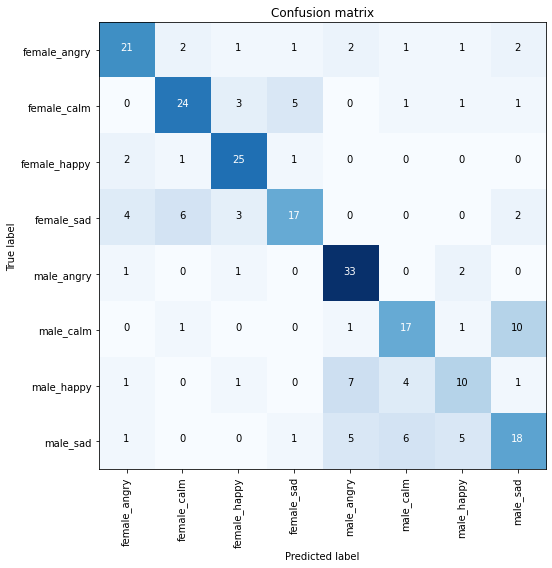

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
classes = Le.classes_
normalize=False
figname = 'Confusion_matrix_concrete1.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print("Confusion matrix, without normalization")
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation="nearest", cmap=cmap)
plt.title(title)
 #plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
fmt = ".2f" if normalize else "d"
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.savefig(figname)

In [218]:

# y_pred = model.predict_classes(X_test)
# y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix( y_test,y_pred1)
plot_confusion_matrix(cm, classes = Le.classes_, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete2.jpg')

Confusion matrix, without normalization


In [210]:
y_pred1=np.argmax(model2.predict(X_test),axis=1)

In [213]:
confusion_matrix(y_test,y_pred1)

array([[21,  2,  1,  1,  2,  1,  1,  2],
       [ 0, 24,  3,  5,  0,  1,  1,  1],
       [ 2,  1, 25,  1,  0,  0,  0,  0],
       [ 4,  6,  3, 17,  0,  0,  0,  2],
       [ 1,  0,  1,  0, 33,  0,  2,  0],
       [ 0,  1,  0,  0,  1, 17,  1, 10],
       [ 1,  0,  1,  0,  7,  4, 10,  1],
       [ 1,  0,  0,  1,  5,  6,  5, 18]], dtype=int64)

In [224]:
print(classification_report(y_test,y_pred,target_names=Le.classes_))

              precision    recall  f1-score   support

female_angry       0.56      0.61      0.58        31
 female_calm       0.61      0.54      0.58        35
female_happy       0.57      0.55      0.56        29
  female_sad       0.55      0.38      0.44        32
  male_angry       0.68      0.92      0.78        37
   male_calm       0.60      0.50      0.55        30
  male_happy       0.34      0.46      0.39        24
    male_sad       0.44      0.39      0.41        36

    accuracy                           0.55       254
   macro avg       0.54      0.54      0.54       254
weighted avg       0.55      0.55      0.54       254



In [228]:
%load_ext tensorboard

In [264]:
Le.classes_

array(['female_angry', 'female_calm', 'female_happy', 'female_sad',
       'male_angry', 'male_calm', 'male_happy', 'male_sad'], dtype=object)